# TMA Training Files (25 total)

# Imports

In [8]:
import os
import gc
import shutil
import glob, pathlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
sns.set_style('darkgrid')
from statistics import mode

os.environ['OPENCV_IO_MAX_IMAGE_PIXELS'] = str(pow(2, 40))
import cv2

import warnings
warnings.filterwarnings('ignore')


# Load Data

In [2]:
top_dir = '/kaggle/input/UBC-OCEAN'
train_dir = '/kaggle/input/UBC-OCEAN/train_images/'
test_dir = '/kaggle/input/UBC-OCEAN/test_images/'

train = pd.read_csv(top_dir + '/train.csv')
test = pd.read_csv(top_dir + '/test.csv')
ss = pd.read_csv(top_dir + '/sample_submission.csv')

train.head()

image_id label  image_width  image_height  is_tma
0         4  HGSC        23785         20008   False
1        66  LGSC        48871         48195   False
2        91  HGSC         3388          3388    True
3       281  LGSC        42309         15545   False
4       286    EC        37204         30020   False

# Create a dataframe of just TMA

In [3]:
tma = train[train.is_tma == True]
tma.head()

image_id label  image_width  image_height  is_tma
2          91  HGSC         3388          3388    True
37       4134    MC         2964          2964    True
76       8280  HGSC         2964          2964    True
83       9200    MC         3388          3388    True
112     13568  LGSC         2964          2964    True

# Add image path to dataframe

In [9]:
# load all tma files and view them.
from pathlib import Path


def set_train_path(n):

    return Path(f'{train_dir}{n}.png')
    
tma['train_path'] = tma.image_id.apply(lambda x: set_train_path(x))
tma.head()

image_id label  image_width  image_height  is_tma  \
375     44603    CC         3388          3388    True   
361     42857    CC         2964          2964    True   
355     41586    CC         2964          2964    True   
299     36302    CC         3388          3388    True   
484     57696    CC         3388          3388    True   

                                         train_path  
375  /kaggle/input/UBC-OCEAN/train_images/44603.png  
361  /kaggle/input/UBC-OCEAN/train_images/42857.png  
355  /kaggle/input/UBC-OCEAN/train_images/41586.png  
299  /kaggle/input/UBC-OCEAN/train_images/36302.png  
484  /kaggle/input/UBC-OCEAN/train_images/57696.png

# Label Distribution

In [5]:
tma.label.value_counts()

label
HGSC    5
MC      5
LGSC    5
EC      5
CC      5
Name: count, dtype: int64

In [10]:
tma.sort_values(by='label', inplace=True)
tma.head()

image_id label  image_width  image_height  is_tma  \
375     44603    CC         3388          3388    True   
361     42857    CC         2964          2964    True   
355     41586    CC         2964          2964    True   
299     36302    CC         3388          3388    True   
484     57696    CC         3388          3388    True   

                                         train_path  
375  /kaggle/input/UBC-OCEAN/train_images/44603.png  
361  /kaggle/input/UBC-OCEAN/train_images/42857.png  
355  /kaggle/input/UBC-OCEAN/train_images/41586.png  
299  /kaggle/input/UBC-OCEAN/train_images/36302.png  
484  /kaggle/input/UBC-OCEAN/train_images/57696.png

# View TMA images

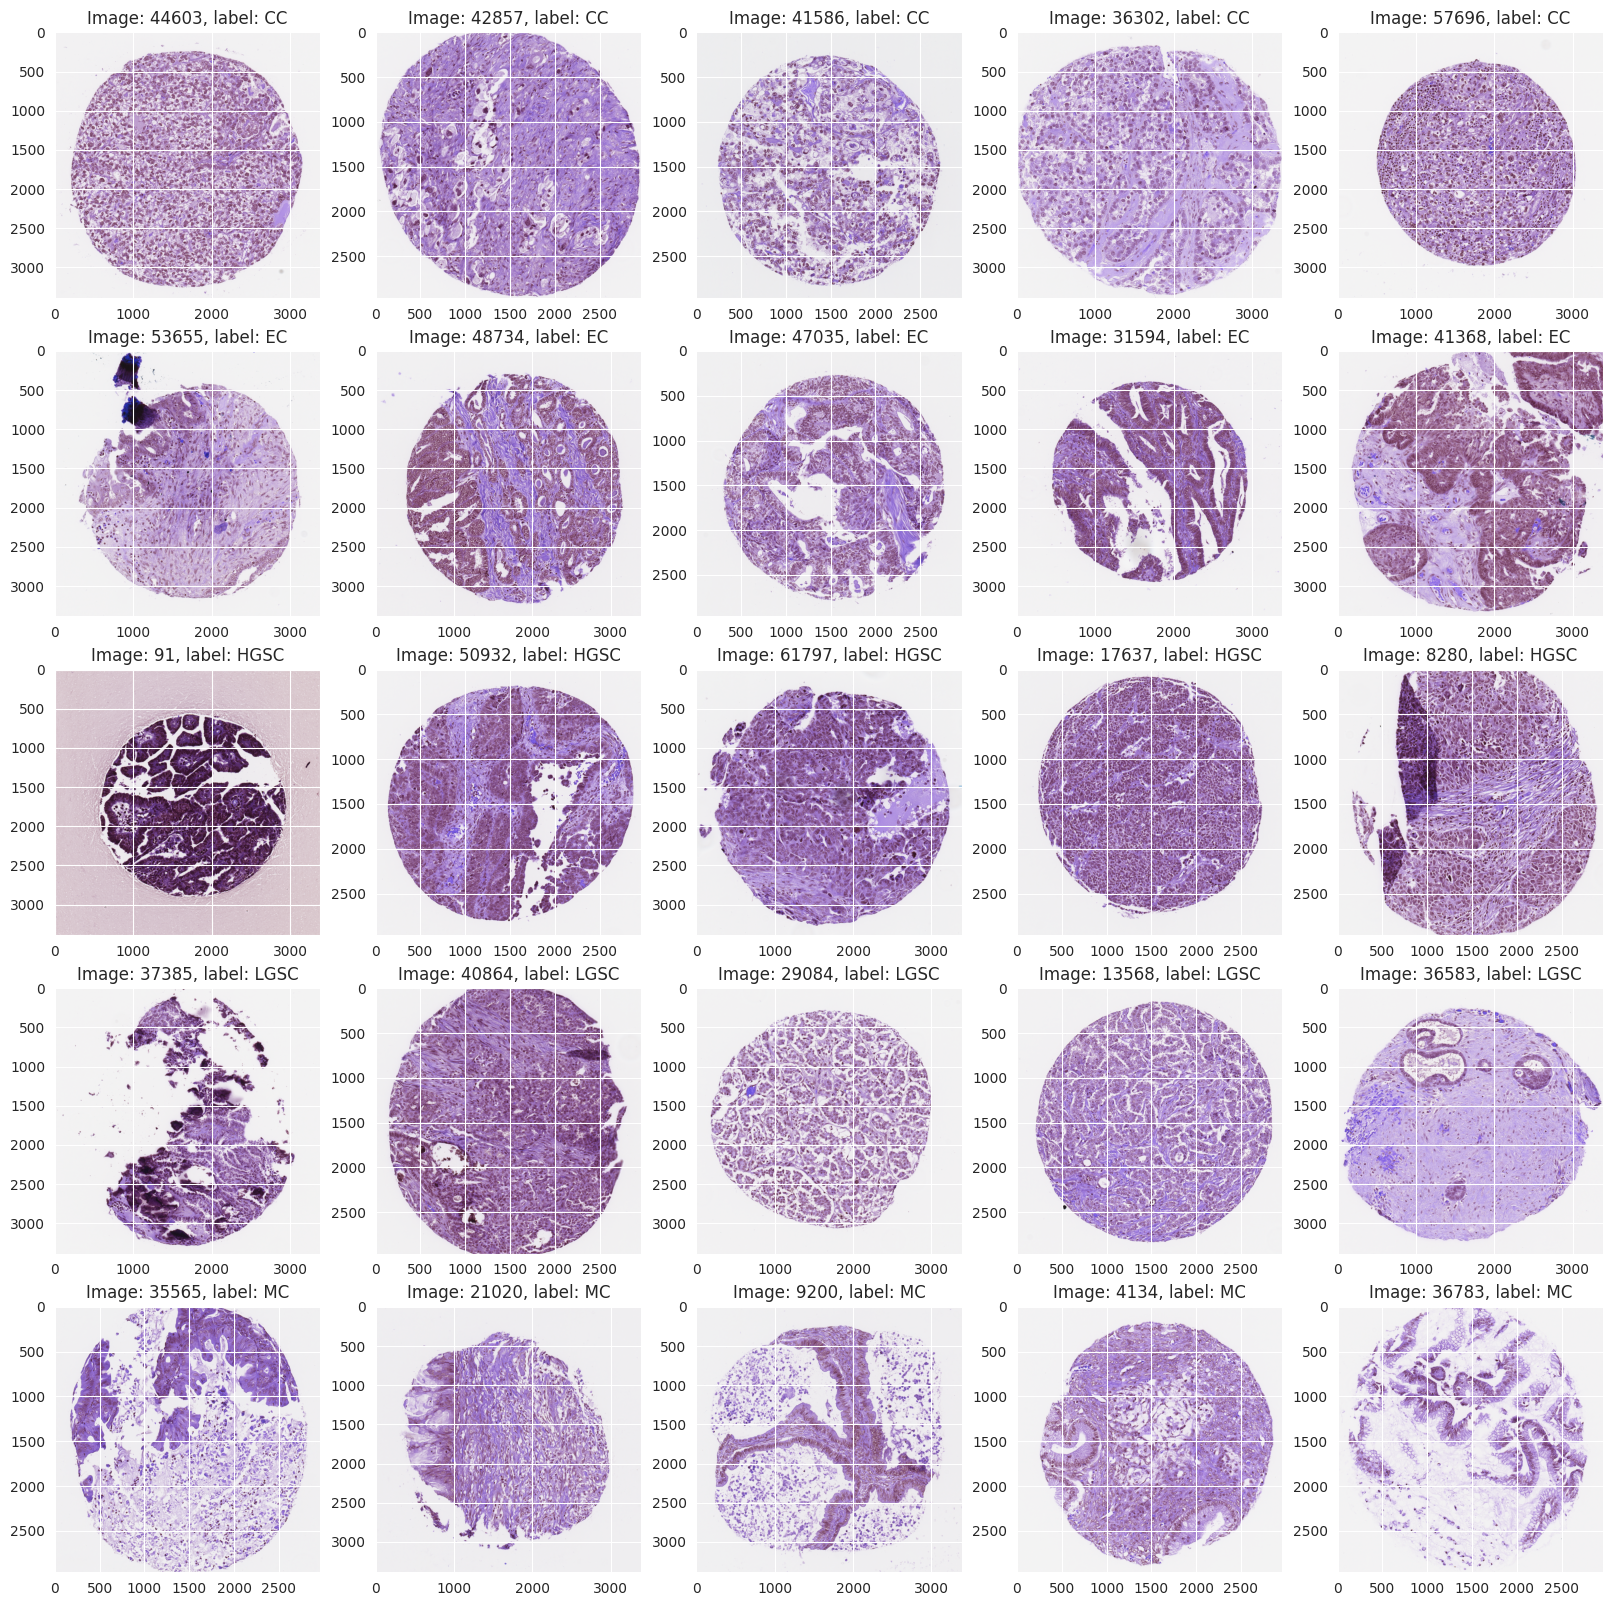

In [7]:
plt.figure(figsize=(20,20))
for idx in range(len(tma)):
    file = tma.train_path.iloc[idx]
    im = cv2.imread(str(file))
    im_id = tma.image_id.iloc[idx]
    im_label = tma.label.iloc[idx]
    plt.subplot(5,5,idx+1)
    plt.imshow(im)
    plt.title(f'Image: {im_id}, label: {im_label}')
    
plt.show()
    